# Equivalent circuit model

In [1]:
%matplotlib notebook
import ecmlib

params = ecmlib.params

file = params.datafiles['hppc']
data = ecmlib.BatteryData(file)

## Parameters

In [2]:
ecmlib.print_parameters(params)


--- Data Files ---

hppc            data/NissanLeaf-cell-Low-Current-HPPC-25C-2.csv
bitrode_1c      data/1C-Discharge-Bitrode-data.csv

--- Cell Parameters ---

a_surf         0.067569  m²         surface area
cp                 1100  J/(kg K)   heat capacity of battery cell
eta_chg            0.98  -          coulombic charge efficiency for cell
eta_dis             1.0  -          coulombic discharge efficiency for cell
h_conv               10  W/(m² K)   convective heat transfer coefficient
m_cell            0.799  kg         mass of battery cell
q_cell             32.0  Ah         total battery cell capacity
tinf             298.15  K          ambient temperature

--- Module Parameters ---

stuff here



## HPPC data

<IPython.core.display.Javascript object>


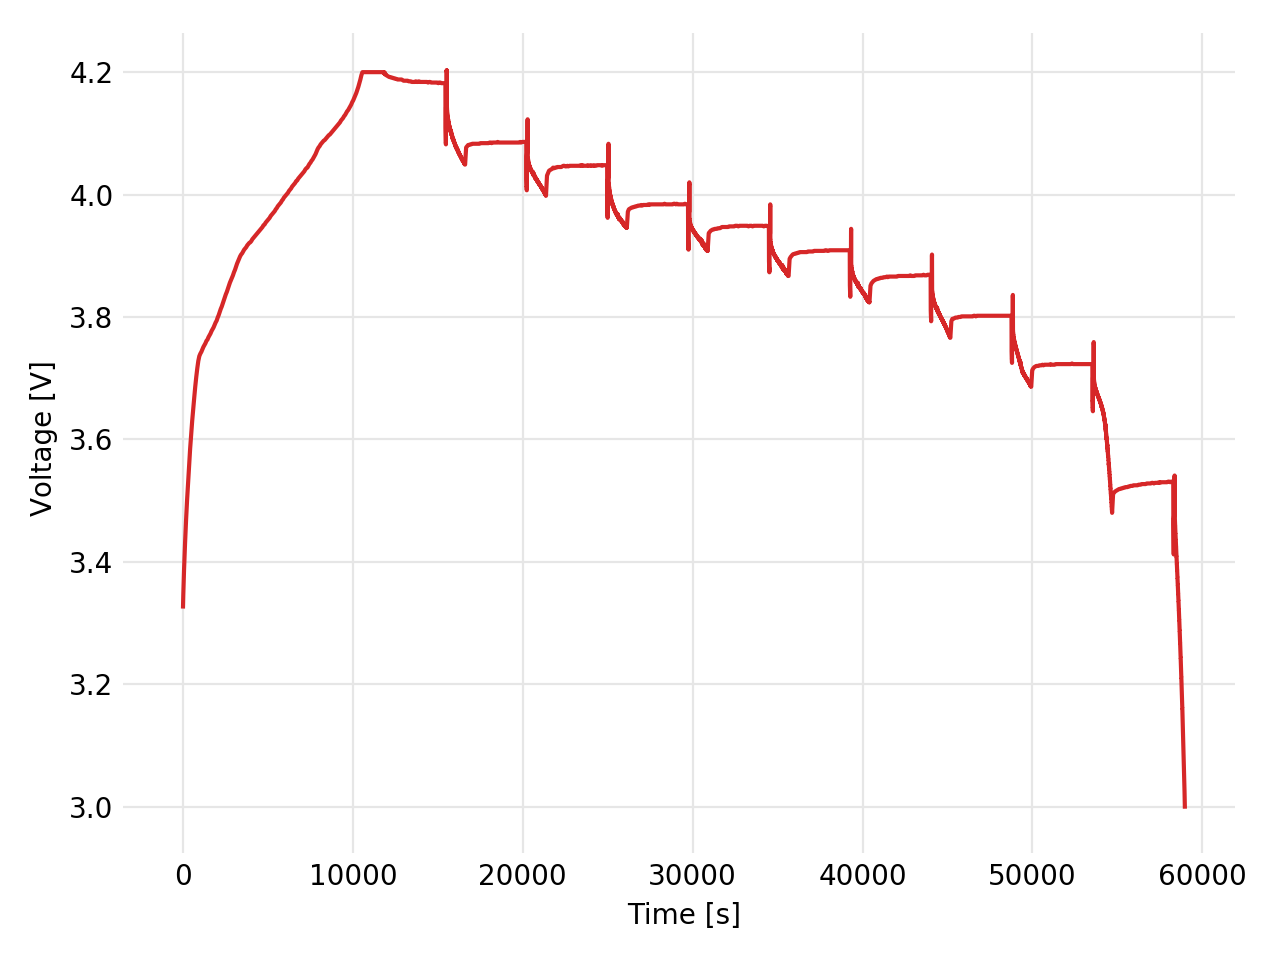

<IPython.core.display.Javascript object>


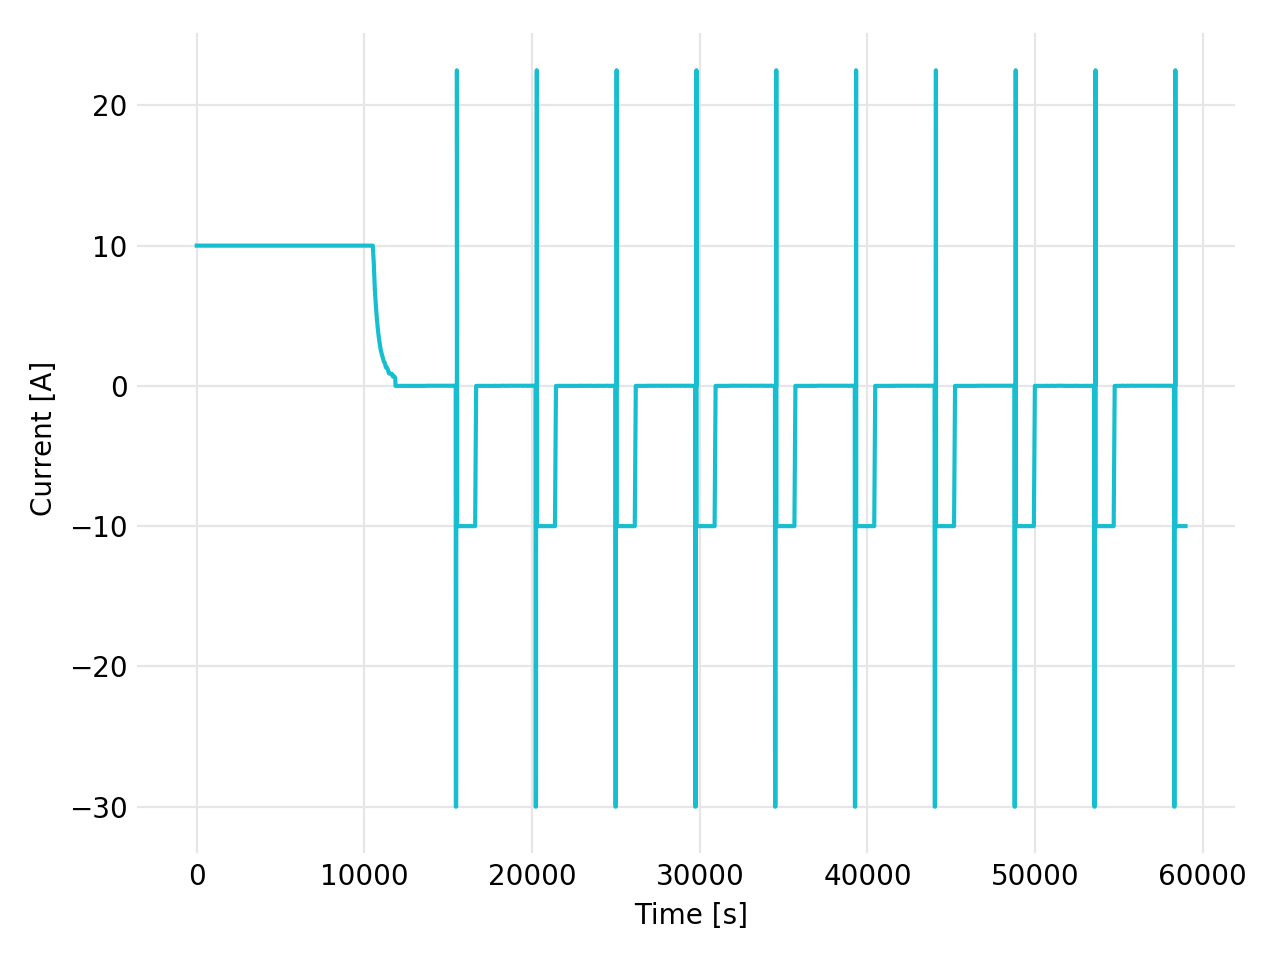

In [3]:
ecmlib.plot_hppc_data(data)

## SOC and OCV


=== State of Charge (SOC) and Open Circuit Voltage (OCV) ===

SOC [-]    OCV [V]   
1.0000     4.1820    
0.8951     4.0860    
0.7905     4.0480    
0.6859     3.9840    
0.5814     3.9490    
0.4769     3.9090    
0.3723     3.8690    
0.2678     3.8020    
0.1631     3.7230    
0.0586     3.5310    
0.0005     3.0000    


<IPython.core.display.Javascript object>


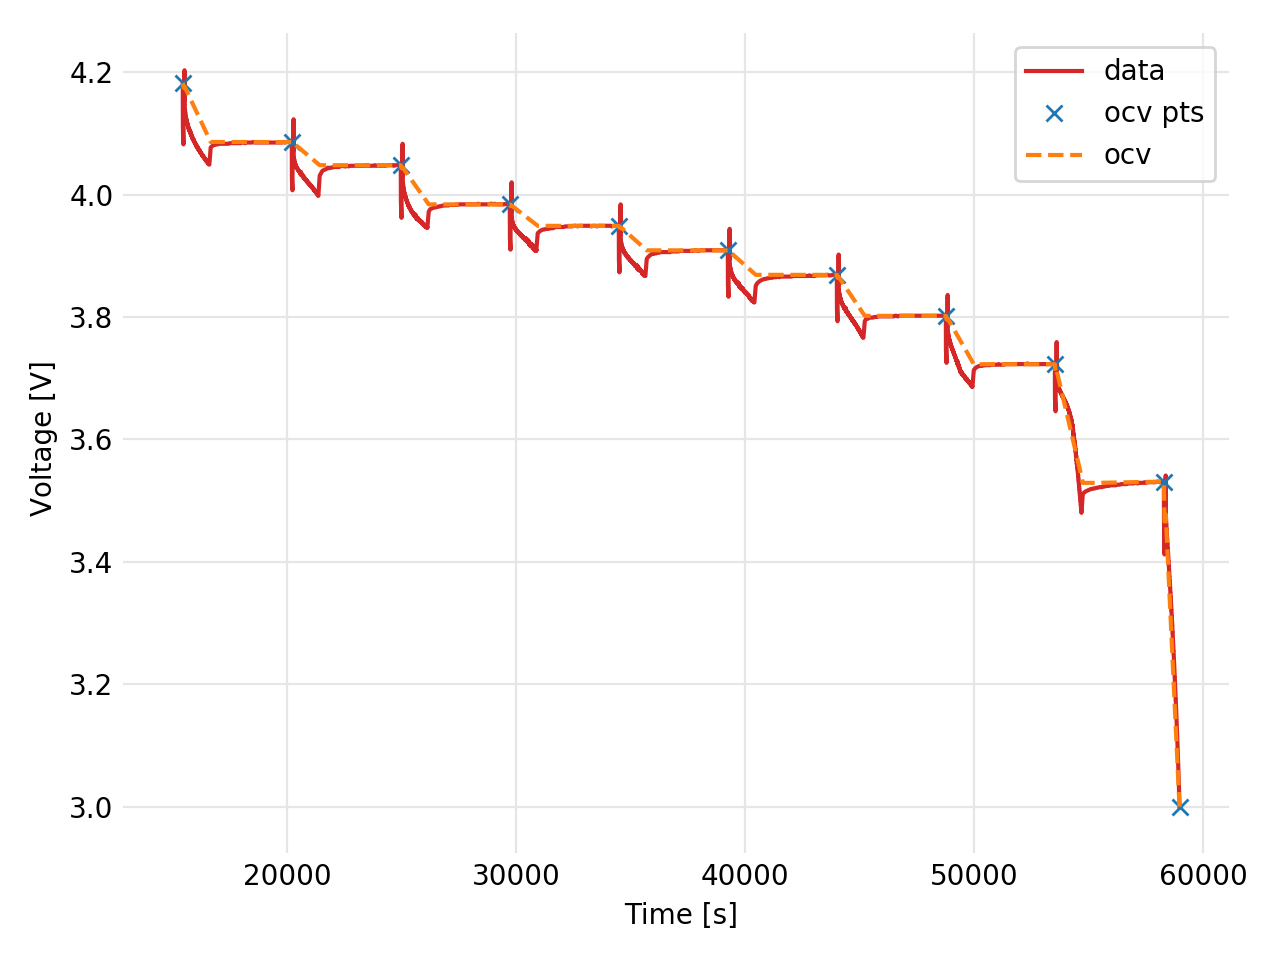

<IPython.core.display.Javascript object>


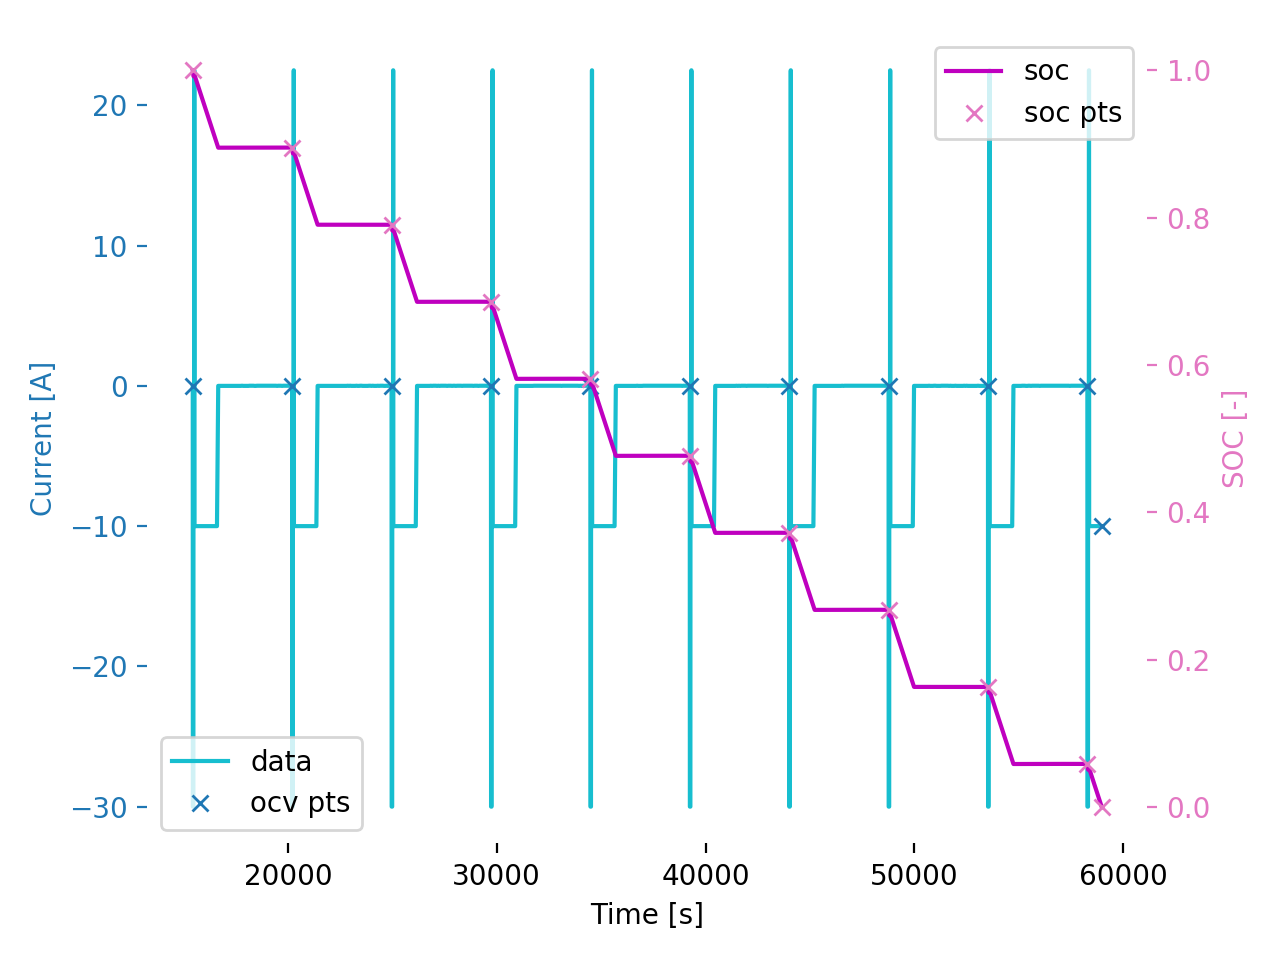

<IPython.core.display.Javascript object>


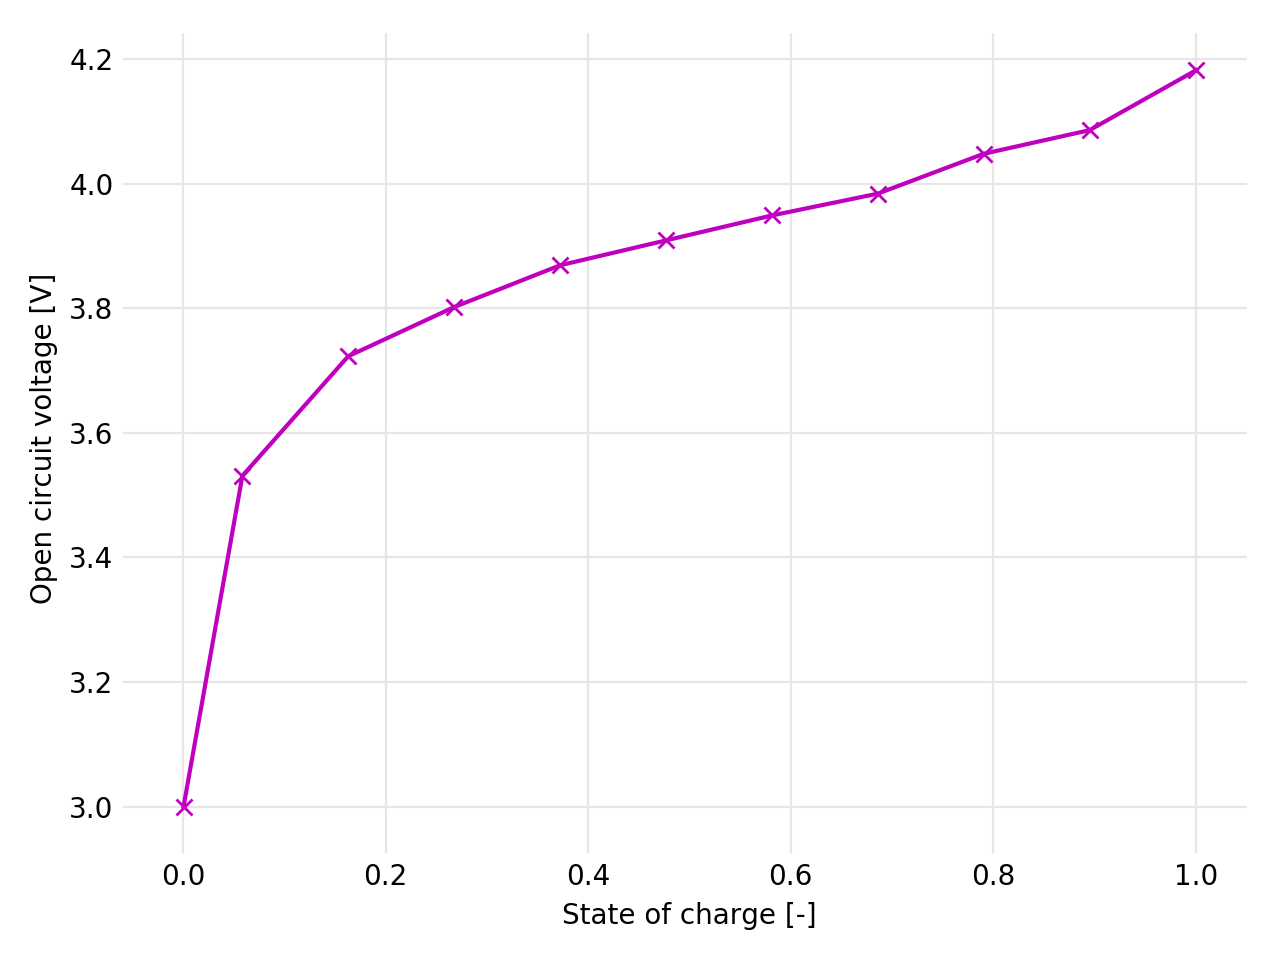

In [4]:
data.process_data()

ecm = ecmlib.EquivCircModel(data, params)
ecmlib.print_soc_ocv(ecm)
ecmlib.plot_soc_ocv(data, ecm)

## Curve fit HPPC data


=== Curve Fit Coefficients ===

a	b	alpha
4.0844	0.0350	0.0210
4.0465	0.0463	0.0123
3.9833	0.0357	0.0131
3.9478	0.0354	0.0120
3.9076	0.0382	0.0117
3.8665	0.0382	0.0084
3.8014	0.0350	0.0200
3.7224	0.0357	0.0173
3.5281	0.0307	0.0027

a	b	c	alpha	beta
4.0854	0.0057	0.0307	0.0014	0.0367
4.0475	0.0134	0.0360	0.0024	0.0320
3.9843	0.0103	0.0280	0.0020	0.0364
3.9490	0.0113	0.0277	0.0017	0.0441
3.9090	0.0102	0.0318	0.0014	0.0301
3.8679	0.0129	0.0310	0.0016	0.0281
3.8020	0.0063	0.0297	0.0021	0.0362
3.7230	0.0074	0.0296	0.0023	0.0342
3.5319	0.0187	0.0332	0.0007	0.0381


<IPython.core.display.Javascript object>


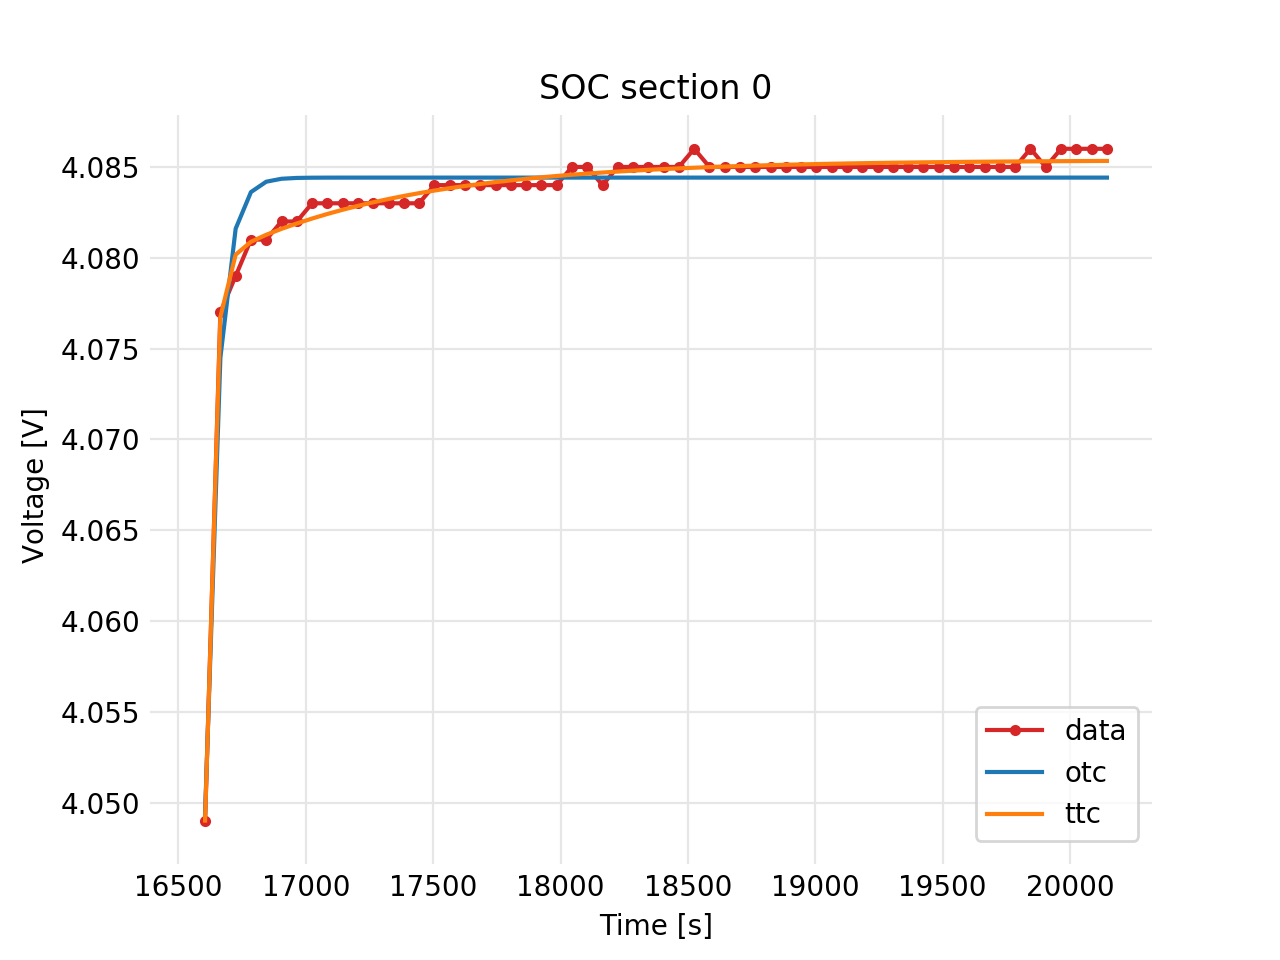

<IPython.core.display.Javascript object>


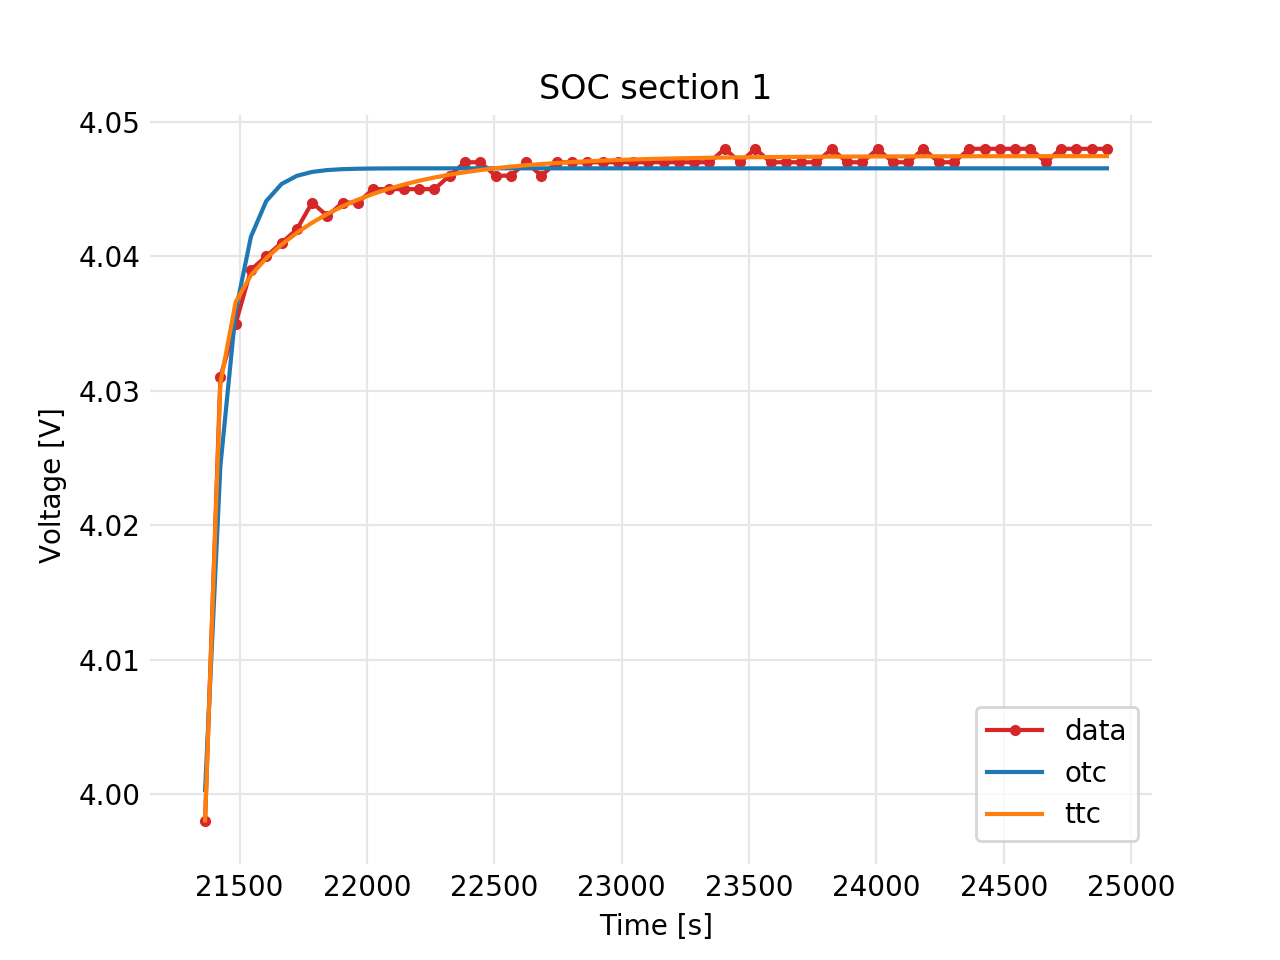

<IPython.core.display.Javascript object>


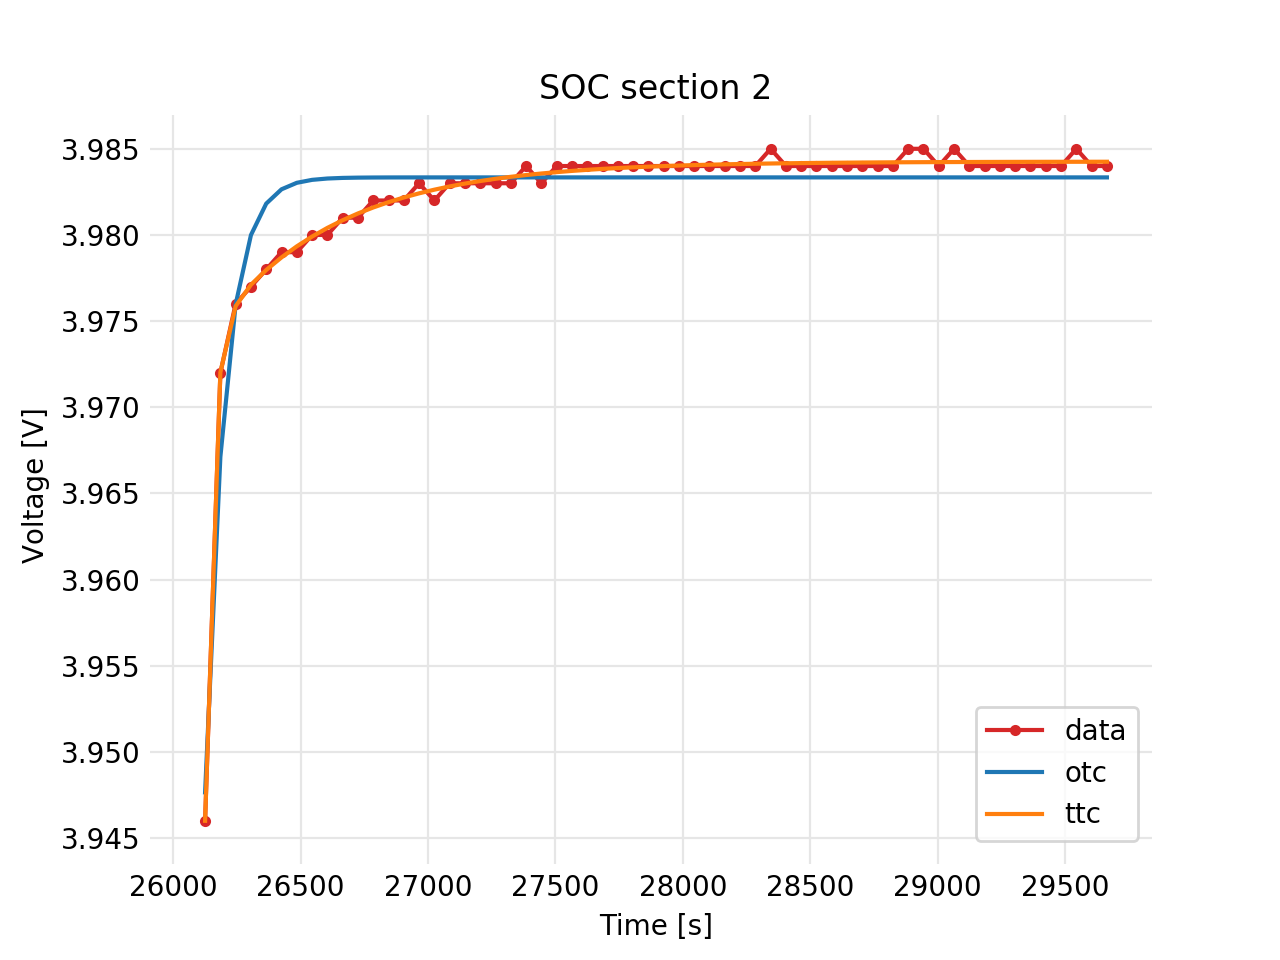

<IPython.core.display.Javascript object>


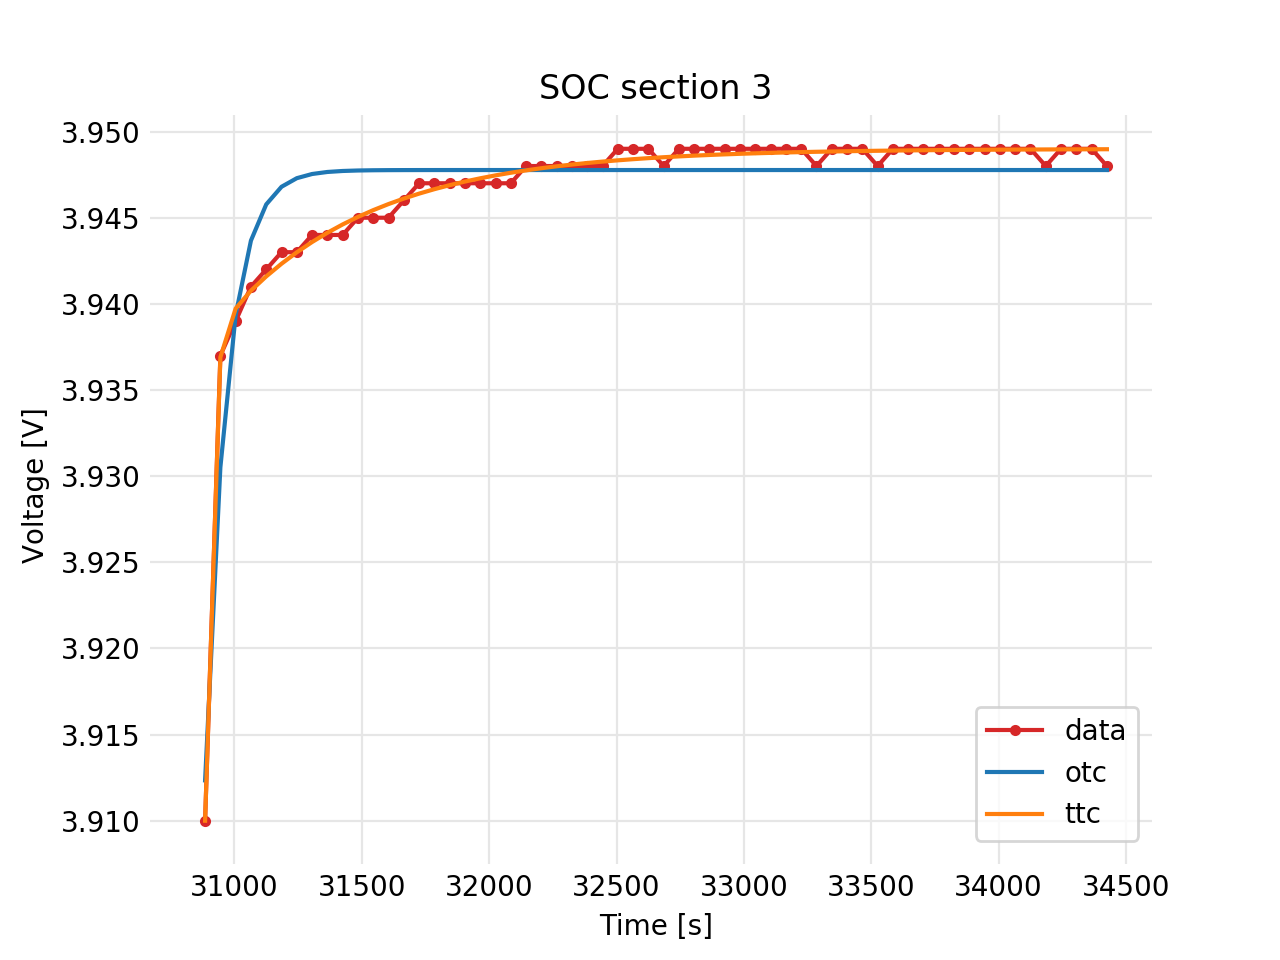

<IPython.core.display.Javascript object>


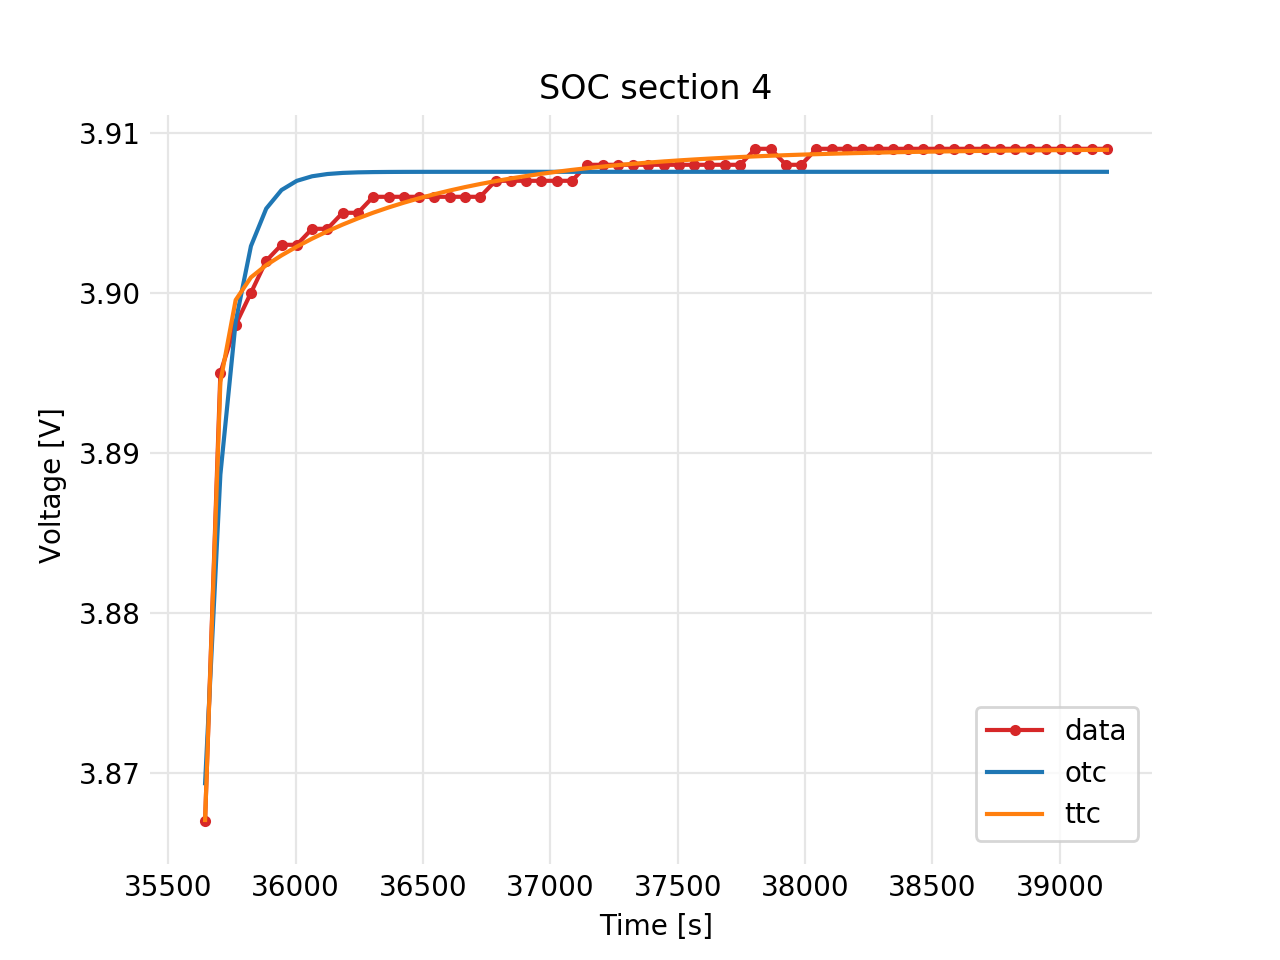

<IPython.core.display.Javascript object>


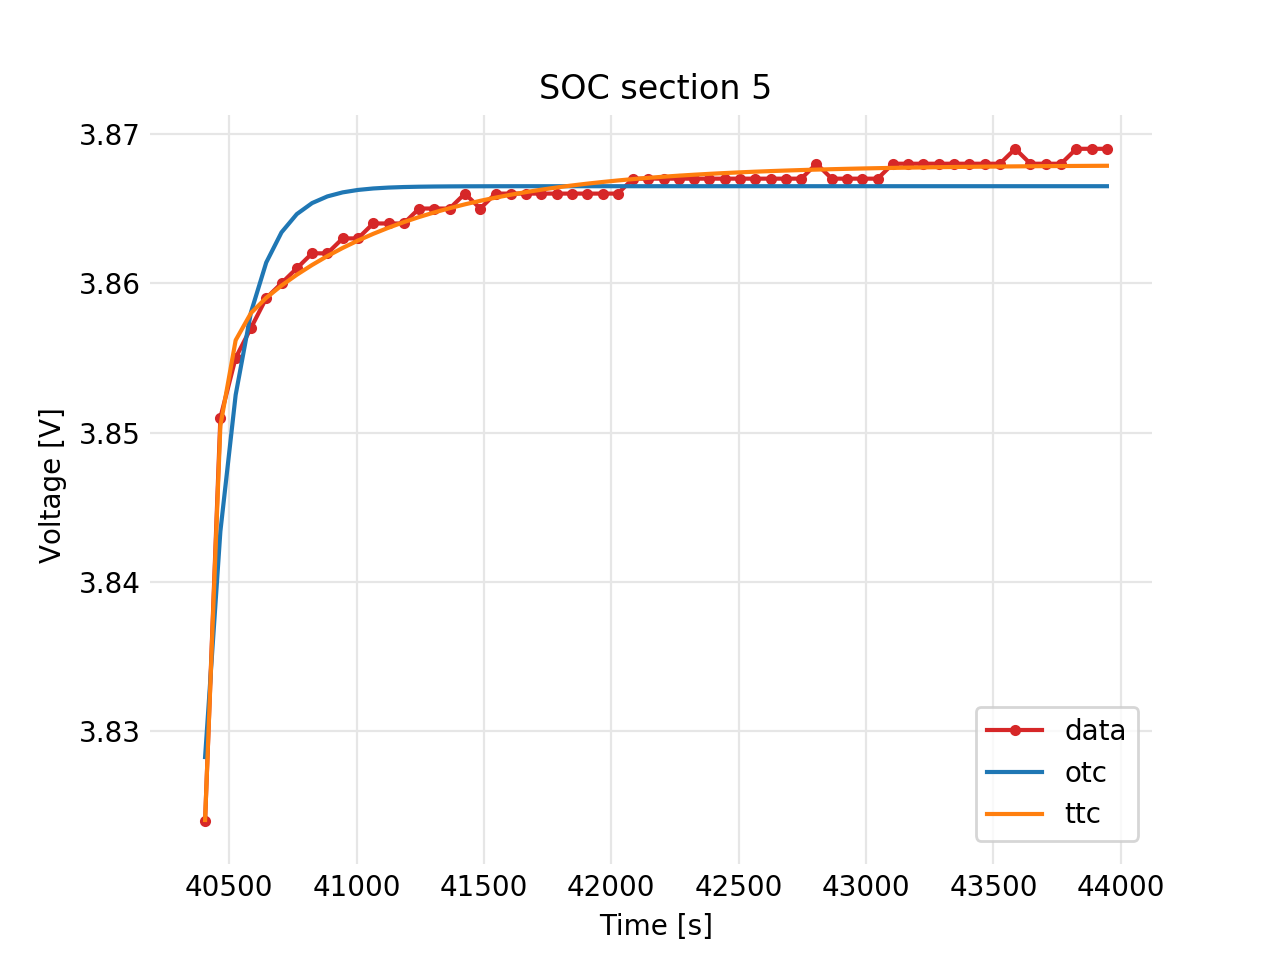

<IPython.core.display.Javascript object>


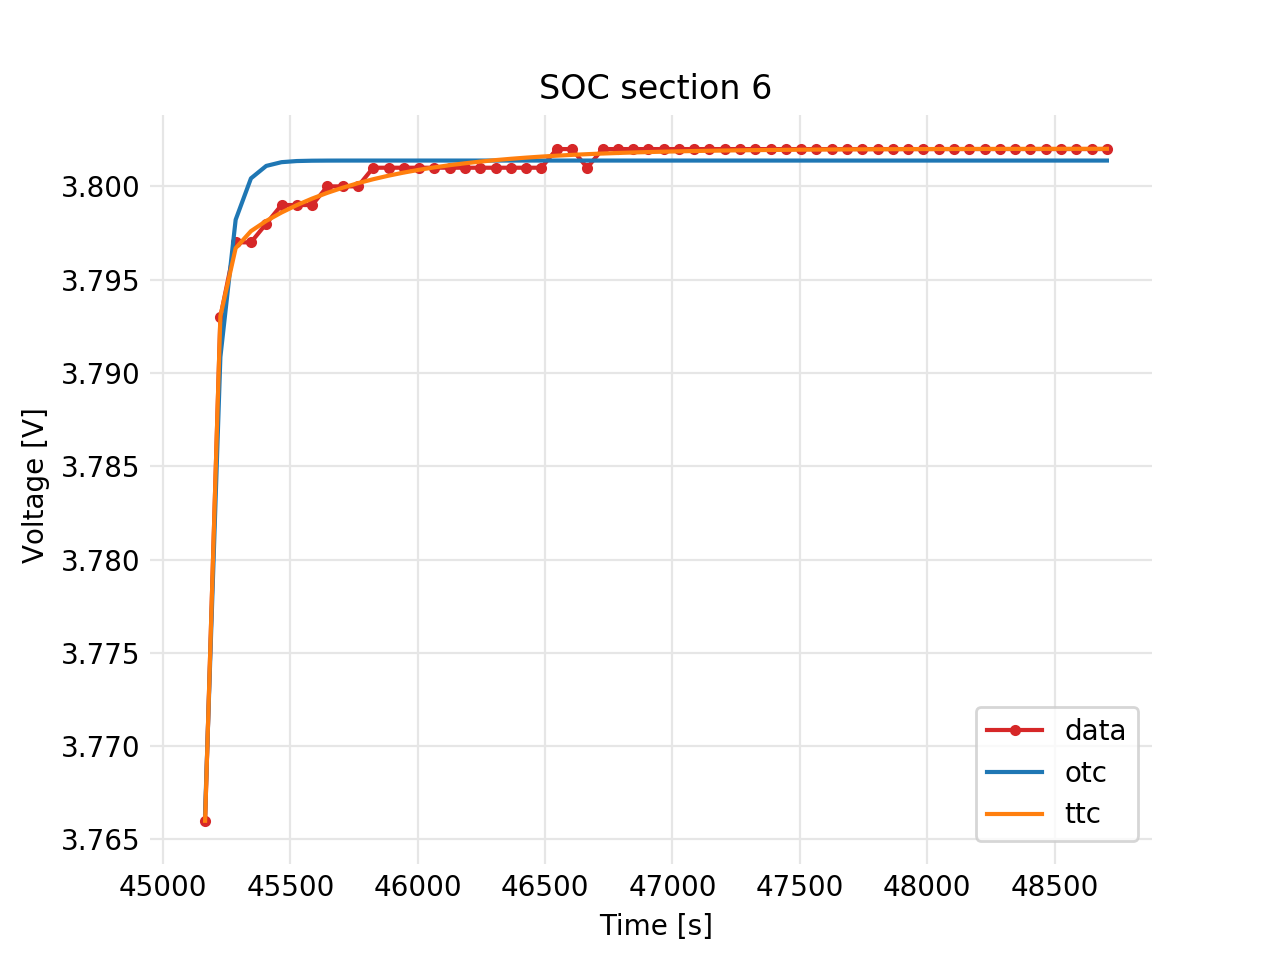

<IPython.core.display.Javascript object>


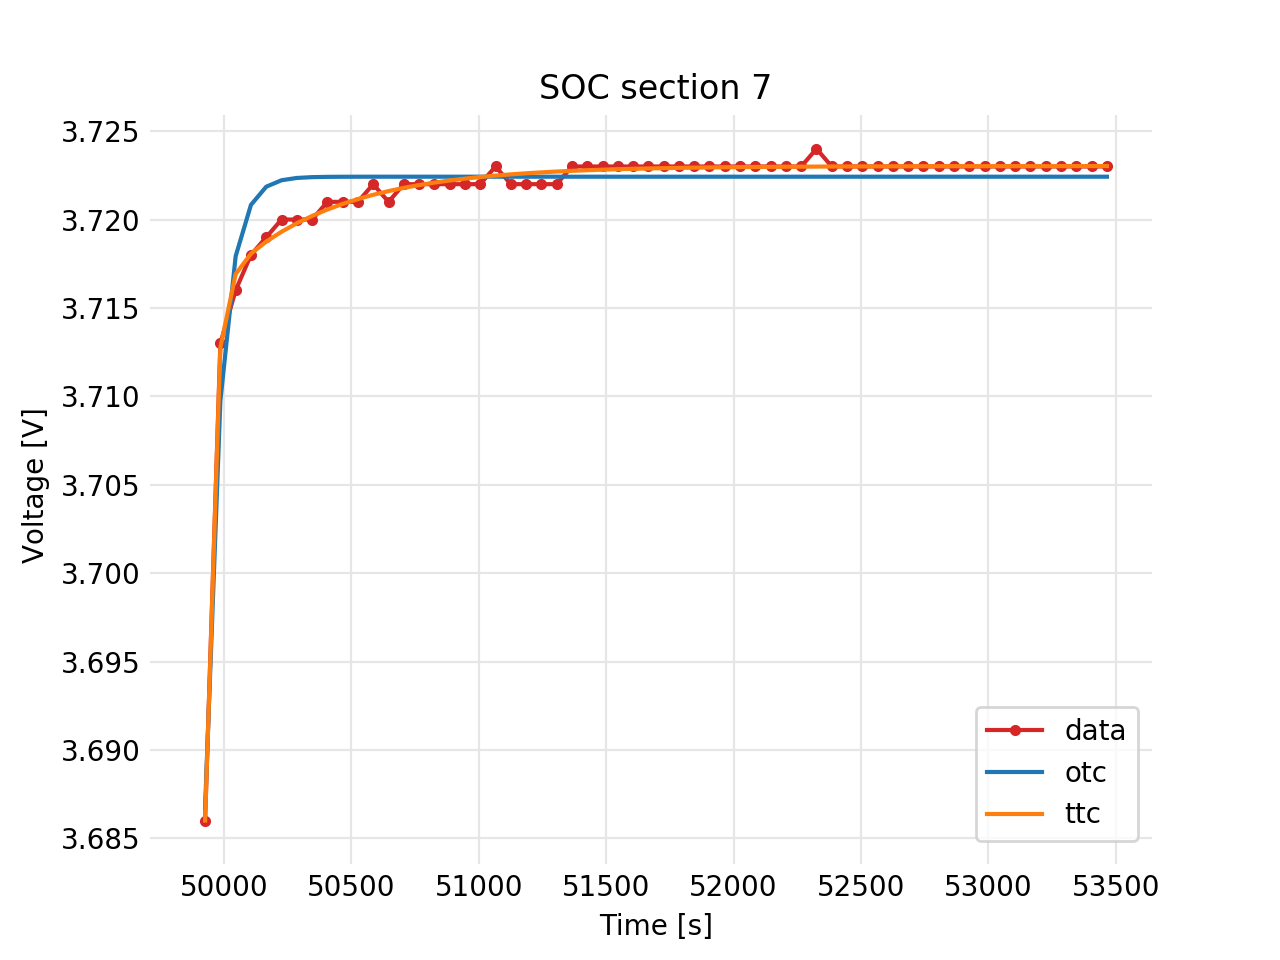

<IPython.core.display.Javascript object>


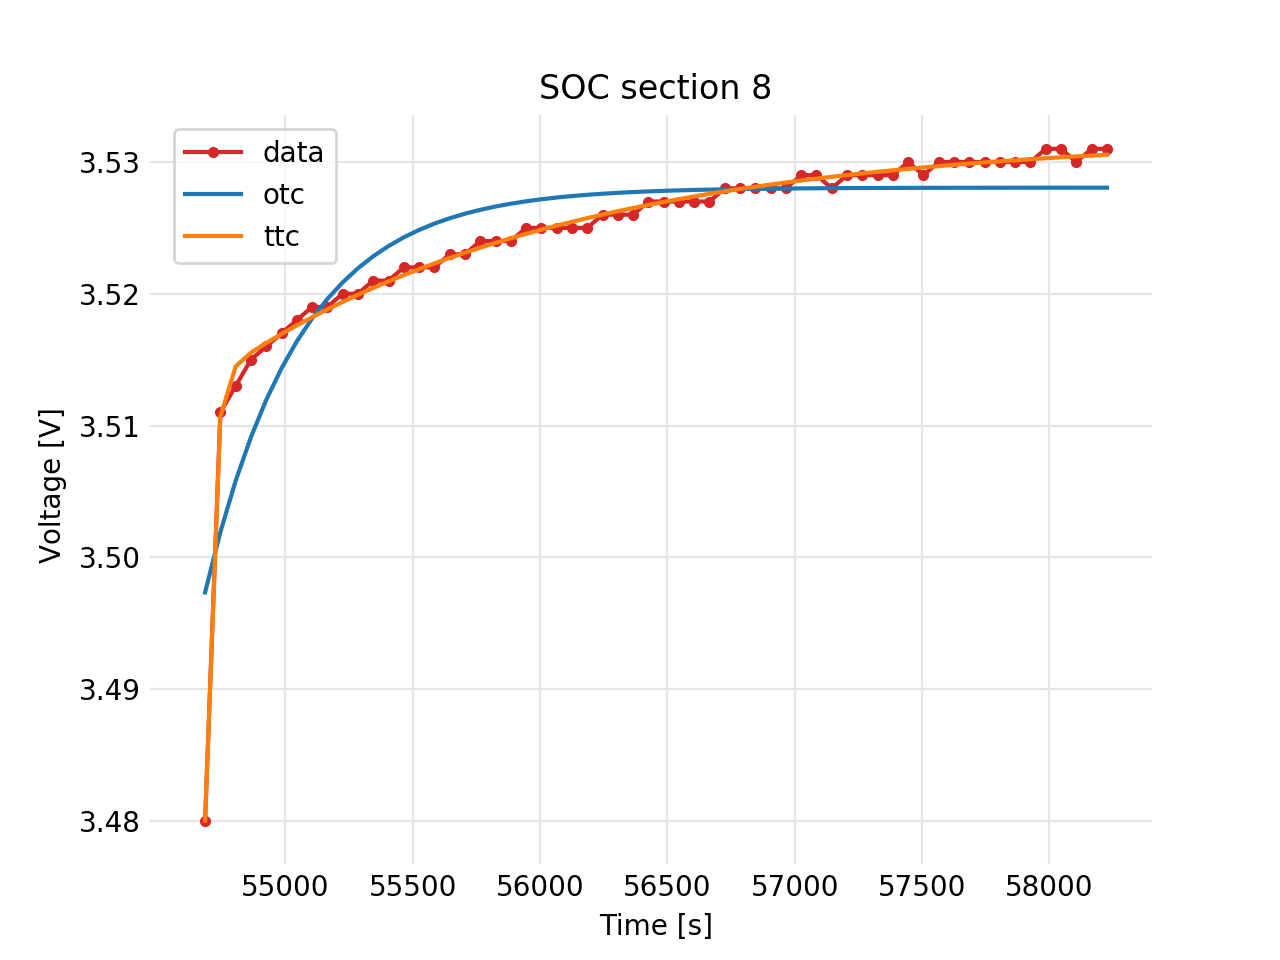

<IPython.core.display.Javascript object>


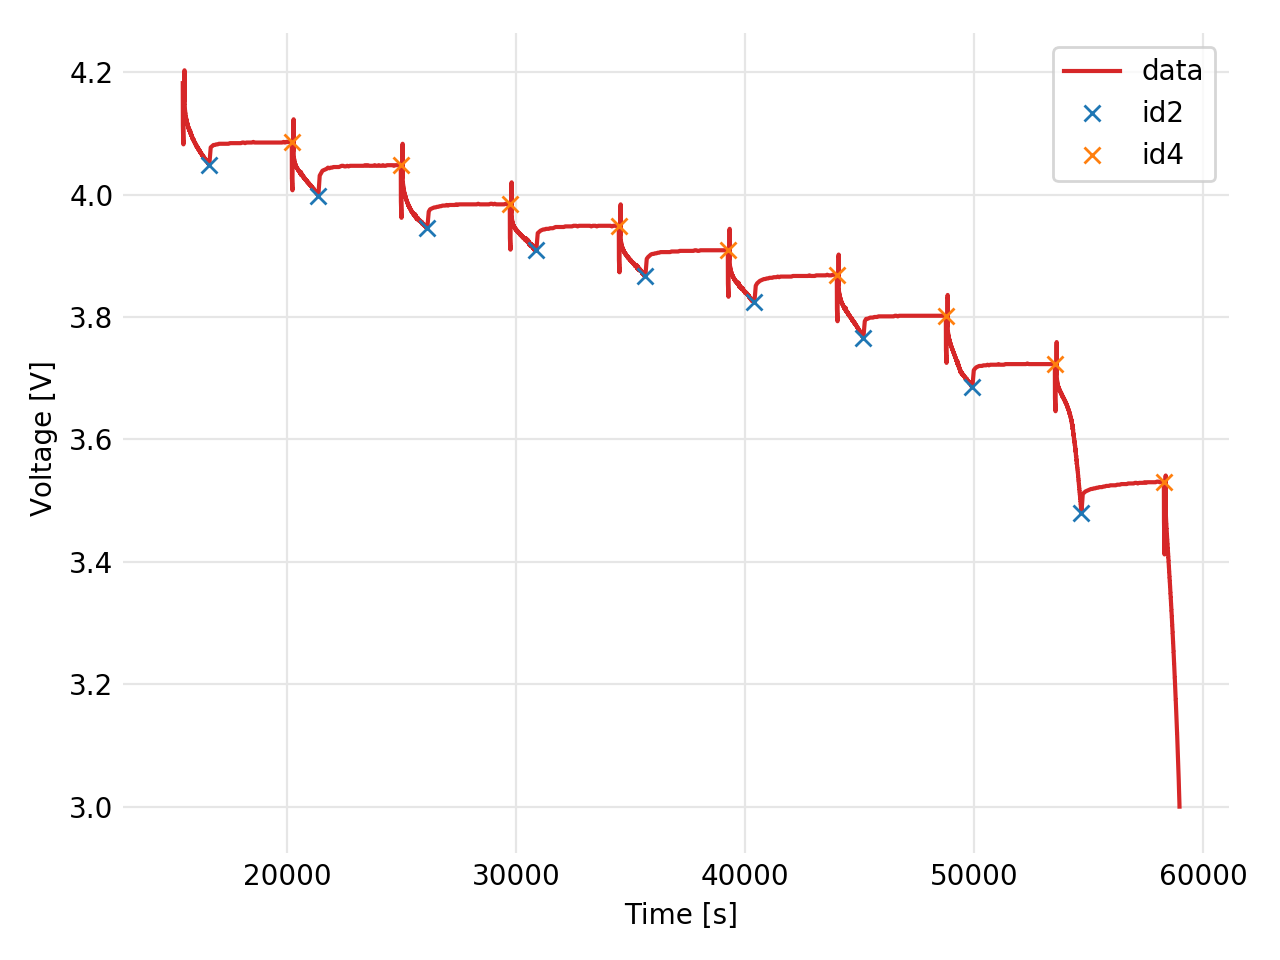

In [5]:
ecmlib.print_coeffs(ecm)
ecmlib.plot_curve_fit(data, ecm)

## RC parameters

In [6]:
ecmlib.print_rctau(ecm)


=== RC Parameters ===

tau1 [s]   tau2 [s]   r0 [Ω]     r1 [Ω]     r2 [Ω]     c1 [F]     c2 [F]    
737.67     27.24      0.0018     0.0003     0.0012     2605167.2  23205.3   
422.65     31.24      0.0016     0.0004     0.0011     946092.3   28173.0   
488.74     27.46      0.0016     0.0004     0.0009     1377057.9  31883.6   
573.33     22.65      0.0016     0.0004     0.0009     1404187.8  26539.7   
704.84     33.23      0.0016     0.0004     0.0010     1761744.6  34003.1   
643.24     35.57      0.0016     0.0005     0.0010     1322336.5  37289.3   
487.78     27.61      0.0016     0.0002     0.0009     2232988.6  30214.7   
435.70     29.28      0.0016     0.0002     0.0009     1753735.1  32135.8   
1356.90    26.21      0.0016     0.0010     0.0010     1295651.3  25640.9   


## Compare ECM to HPPC

<IPython.core.display.Javascript object>


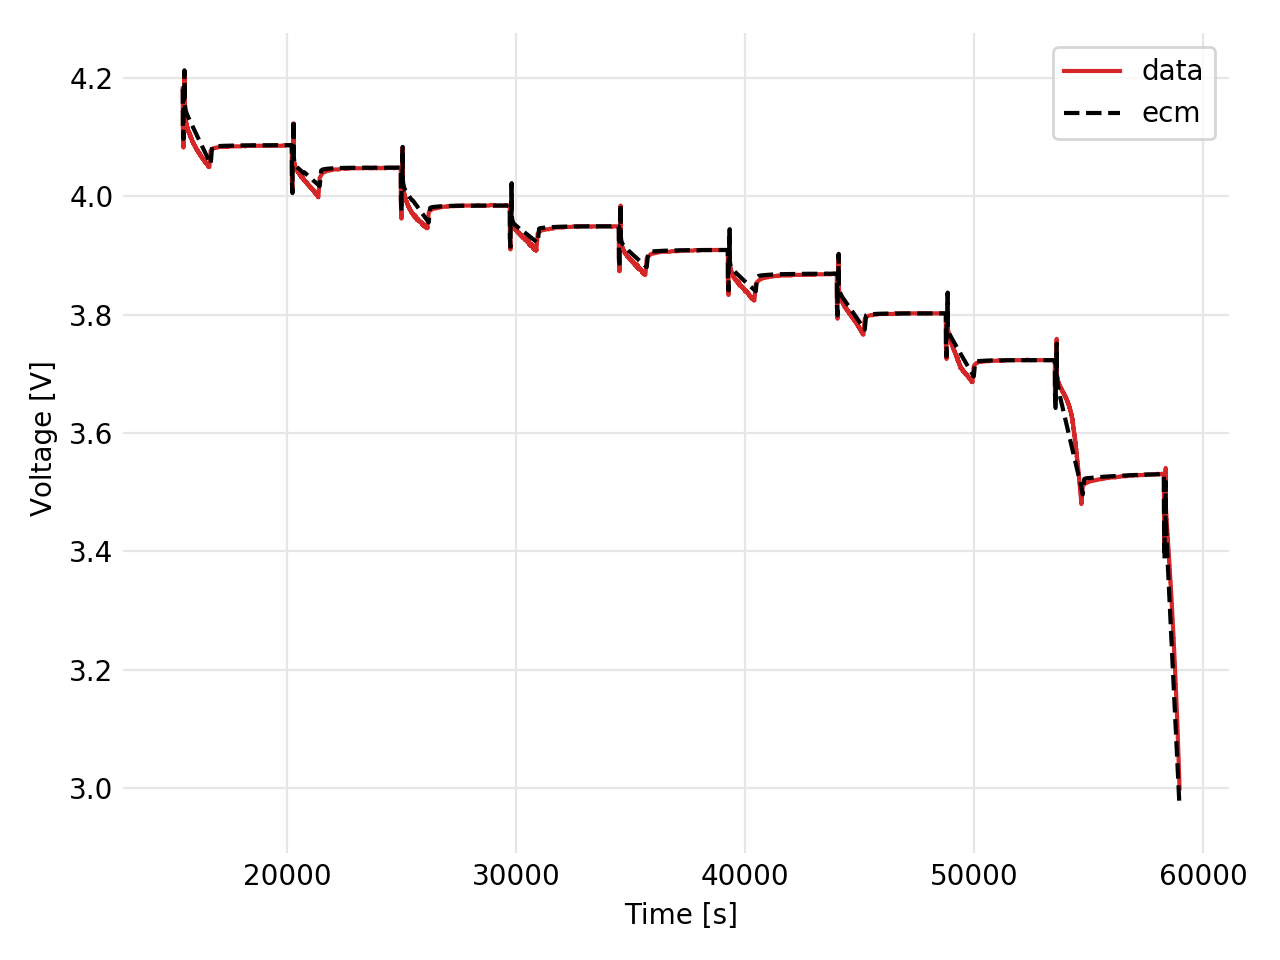

<IPython.core.display.Javascript object>


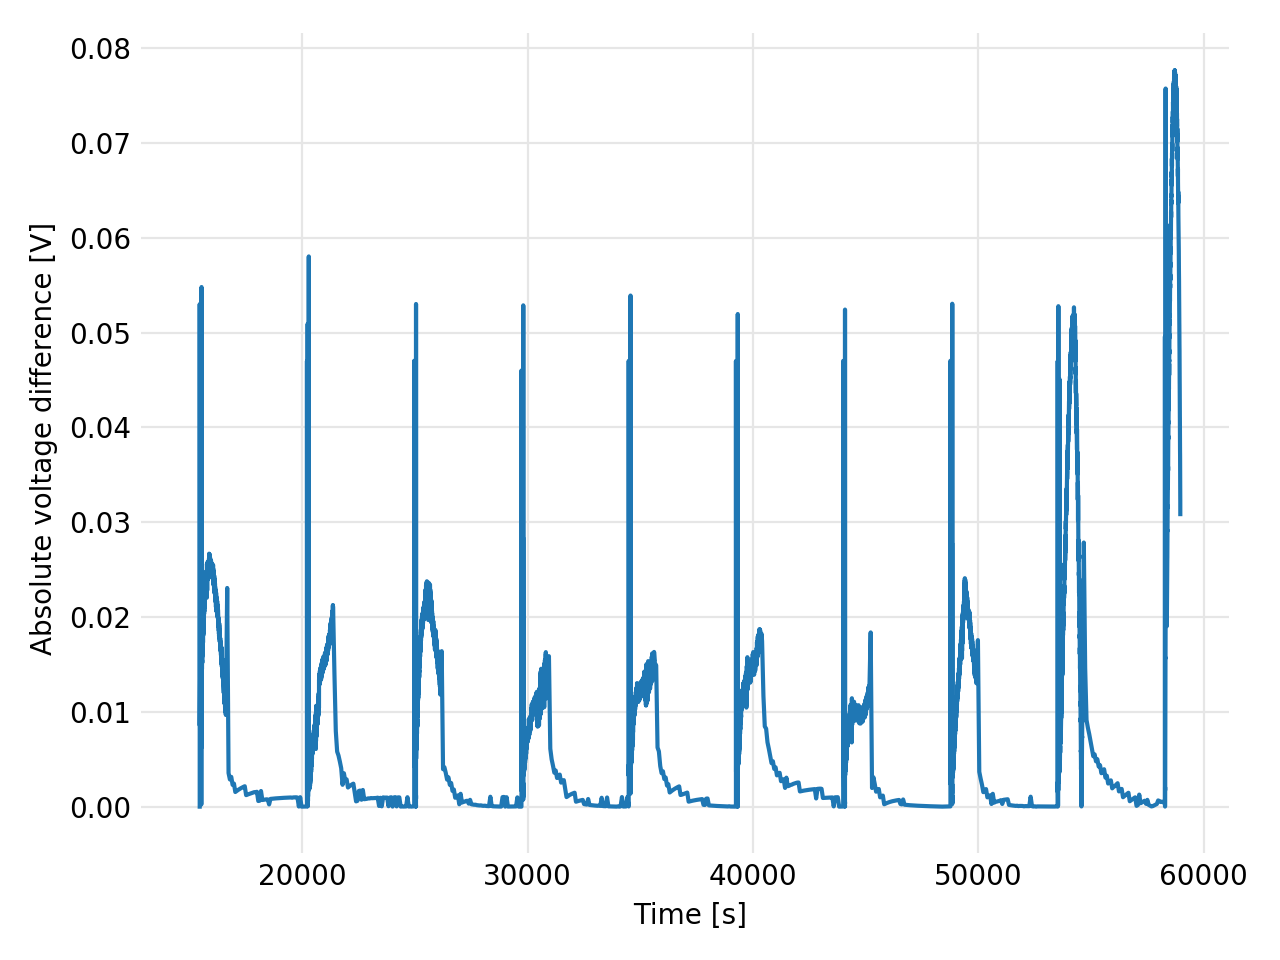

In [7]:
coeffs_ttc = ecm.curve_fit_coeff(ecm.func_ttc, 5)
rctau = ecm.rctau_ttc(coeffs_ttc)
v_ecm = ecm.v_ecm(ecm.soc, ecm.ocv, rctau)
ecmlib.plot_v_ecm(data, v_ecm)